In [60]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [51]:
testFileName = "Datasets/Dataset_1_test.csv"
    
testFile = pd.read_csv(testFileName, header=None)
testFile = testFile.drop([2], axis=1) # empty column
input_test = testFile[0]
output_test = testFile[1]

trainFileName = "Datasets/Dataset_1_train.csv"

trainFile = pd.read_csv(trainFileName, header=None)
trainFile = trainFile.drop([2], axis=1) # empty column
input_train = trainFile[0]
output_train = trainFile[1]

validFileName = "Datasets/Dataset_1_valid.csv"

validFile = pd.read_csv(validFileName, header=None)
validFile = validFile.drop([2], axis=1) # empty column
input_valid = validFile[0]
output_valid = validFile[1]

In [22]:
def buildMatrix(l, degree):
    m = np.zeros((len(l), degree+1)) # initializing matrix
    
    powerList = []
    for i in range(degree+1):
        powerList.append(i)
    
    for row in range(len(l)):
        m[row] = l[row]
        m[row] = np.power(m[row], powerList)

    return m

In [169]:
def calcMse(m, y, w, regularizationCoef):
    error = 0
    for i in range(len(y)):
        error += ((np.dot(m[i], w) - y[i])**2)/2
    
    if (regularizationCoef > 0):
        error += float(regularizationCoef)*(norm(w)**2)/2
    
    return error

In [121]:
def calcWeights(m, y, regularizationCoef):
    if (regularizationCoef > 0):
        return np.dot(np.dot(np.linalg.inv(np.add(np.dot(m.T,m), np.dot(regularizationCoef,np.eye(len(m.T))))), m.T), y)
    else:
        return np.dot(np.dot(np.linalg.inv(np.dot(m.T, m)), m.T), y)

In [118]:
m_train = buildMatrix(input_train, 20)
m_valid = buildMatrix(input_valid, 20)

w = calcWeights(m_train, output_train)

yPredicted_train = np.dot(m_train, w)
yPredicted_valid = np.dot(m_valid, w)

print("MSE Train:")
print(calcMse(m_train, output_train, w, 0))

print("")
print("MSE Valid:")
print(calcMse(m_valid, output_valid, w, 0))

MSE Train:
6.4747033381

MSE Valid:
1421.94624006


(-15, 30)

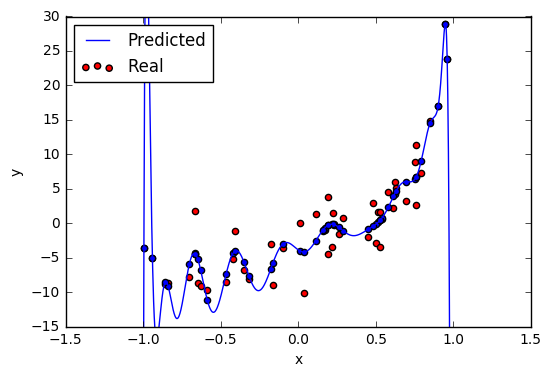

In [101]:
plt.scatter(input_train, output_train, c='r', label="Real")
plt.scatter(input_train, yPredicted_train, c='b')
cont_x = np.linspace(-1.0, 1.0, num=1000)
cont_y = vp(cont_x)
plt.plot(cont_x, cont_y, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=2)
plt.ylim(-15,30)

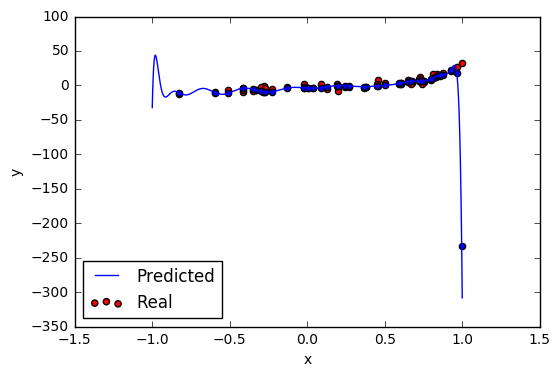

In [107]:
plt.scatter(input_valid, output_valid, c='r', label="Real")
plt.scatter(input_valid, yPredicted_valid, c='b')
cont_x = np.linspace(-1.0, 1.0, num=1000)
cont_y = vp(cont_x)
plt.plot(cont_x, cont_y, label="Predicted")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(loc=3)

In [102]:
p = np.poly1d(np.flipud(w))
vp = np.vectorize(p)

In [130]:
lambdas = np.linspace(0.001, 1, 1000)
lambdas

array([ 0.001,  0.002,  0.003,  0.004,  0.005,  0.006,  0.007,  0.008,
        0.009,  0.01 ,  0.011,  0.012,  0.013,  0.014,  0.015,  0.016,
        0.017,  0.018,  0.019,  0.02 ,  0.021,  0.022,  0.023,  0.024,
        0.025,  0.026,  0.027,  0.028,  0.029,  0.03 ,  0.031,  0.032,
        0.033,  0.034,  0.035,  0.036,  0.037,  0.038,  0.039,  0.04 ,
        0.041,  0.042,  0.043,  0.044,  0.045,  0.046,  0.047,  0.048,
        0.049,  0.05 ,  0.051,  0.052,  0.053,  0.054,  0.055,  0.056,
        0.057,  0.058,  0.059,  0.06 ,  0.061,  0.062,  0.063,  0.064,
        0.065,  0.066,  0.067,  0.068,  0.069,  0.07 ,  0.071,  0.072,
        0.073,  0.074,  0.075,  0.076,  0.077,  0.078,  0.079,  0.08 ,
        0.081,  0.082,  0.083,  0.084,  0.085,  0.086,  0.087,  0.088,
        0.089,  0.09 ,  0.091,  0.092,  0.093,  0.094,  0.095,  0.096,
        0.097,  0.098,  0.099,  0.1  ,  0.101,  0.102,  0.103,  0.104,
        0.105,  0.106,  0.107,  0.108,  0.109,  0.11 ,  0.111,  0.112,
      

In [170]:
trainMse = []
validMse = []

for i in range(len(lambdas)):
    w = calcWeights(m_train, output_train, lambdas[i])
    trainMse.append(calcMse(m_train, output_train, w, lambdas[i]))
    validMse.append(calcMse(m_valid, output_valid, w, lambdas[i]))
    

In [132]:
def norm(w):
    return np.linalg.norm(w)

(-0.1, 1)

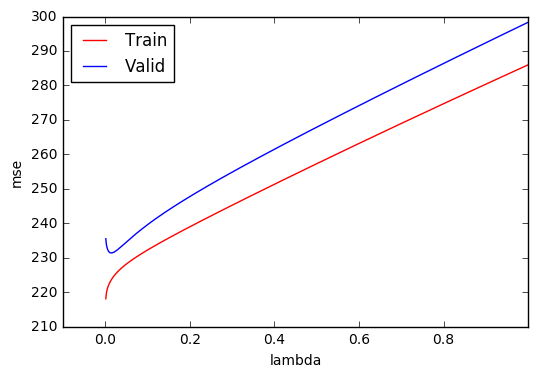

In [176]:
plt.plot(lambdas, trainMse, c='r', label="Train")
plt.plot(lambdas, validMse, c='b', label="Valid")
plt.xlabel("lambda")
plt.ylabel("mse")
plt.legend(loc=2)
plt.xlim(-0.1, 1)

In [172]:
minValidMse = min(validMse)
minValidLambda = lambdas[validMse.index(minValidMse)]

print(minValidMse)
print(minValidLambda)

231.353247304
0.014
